# Importing Libraries

In [1]:
import numpy as np
import cv2

# Loading Data

In [2]:
with_mask= np.load('with_mask.npy')
without_mask= np.load('without_mask.npy')
improper_mask= np.load('improper_mask.npy')

# Data Preprocessing

In [3]:
with_mask.shape

(400, 50, 50, 3)

### Reshaping Images

In [4]:
with_mask = with_mask.reshape(400,50 * 50 * 3)

without_mask = without_mask.reshape(400, 50 * 50 * 3)

improper_mask = improper_mask.reshape(400,50 * 50 * 3)


In [5]:
X = np.r_[with_mask,without_mask,improper_mask]

In [6]:
X.shape

(1200, 7500)

### Labelling Images

In [7]:
labels = np.zeros(X.shape[0])

In [8]:
labels[400:] = 1.0

In [9]:
labels[800:] = 2.0

In [10]:
names = {0 : 'Mask', 1 : 'No Mask', 2 : 'Improper Mask'}

# Splitting the Dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,labels,test_size=0.25)

In [13]:
x_train.shape

(900, 7500)

# Reducing Features Using PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)

In [16]:
x_train[0]

array([ -547.9111677 ,  1160.00440202, -1193.52295973,  1524.51217576,
        -665.56585816])

In [17]:
x_train.shape

(900, 5)

In [18]:
x_test = pca.transform(x_test)

# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 1)
clf_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [21]:
x_test.shape

(300, 5)

In [22]:
y_pred = clf_model.predict(x_test)

In [23]:
x_test.shape

(300, 5)

# Model Evaluation(Decision Tree)

In [24]:
accuracy_score(y_test, y_pred)

0.9633333333333334

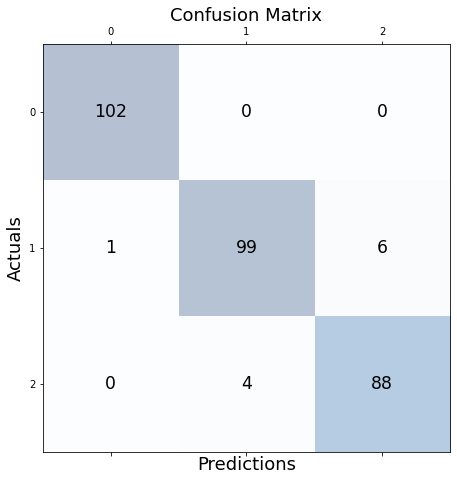

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels = clf_model.classes_)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       102
         1.0       0.96      0.93      0.95       106
         2.0       0.94      0.96      0.95        92

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
clf_random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [29]:
y_pred_rfc = clf_model.predict(x_test)

In [30]:
accuracy_score(y_test, y_pred_rfc)

0.9633333333333334

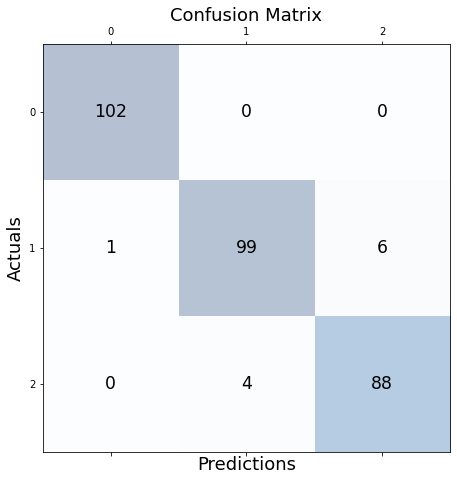

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_rfc, labels = clf_random_forest.classes_)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       102
         1.0       0.96      0.93      0.95       106
         2.0       0.94      0.96      0.95        92

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# Support Vector Machine Classifier

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svm.fit(x_train, y_train)
clf_svm.score(x_test, y_test)



0.9766666666666667

# Hyper-parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [0.0001,0.001,0.01,10],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(x_train,y_train)
clf.cv_results_

{'mean_fit_time': array([7.82049179e-02, 4.46039677e-02, 7.58059025e-02, 3.18224239e-01,
        6.96051598e-02, 3.21084638e+00, 8.58064175e-02, 1.73722412e+02]),
 'std_fit_time': array([8.92996118e-03, 8.73103614e-03, 7.67954267e-03, 5.50873266e-02,
        6.88777747e-03, 6.25408654e-01, 8.08542410e-03, 8.78289279e+01]),
 'mean_score_time': array([0.02000217, 0.00159945, 0.01960173, 0.00140047, 0.02260146,
        0.00140057, 0.02340178, 0.00140114]),
 'std_score_time': array([2.41451052e-06, 4.89318238e-04, 8.00981225e-04, 4.90174312e-04,
        2.57803940e-03, 4.89804116e-04, 1.85538120e-03, 4.90311281e-04]),
 'param_C': masked_array(data=[0.0001, 0.0001, 0.001, 0.001, 0.01, 0.01, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear'],
              mask=[False, False, False, F

In [100]:
#selected best kernel and Reguralization Parameter
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [101]:
clf.best_score_

0.9400000000000001

In [34]:
#selected best svm model 
y_pred_svm = clf_svm.predict(x_test)

In [35]:
accuracy_score(y_test, y_pred_svm)

0.9766666666666667

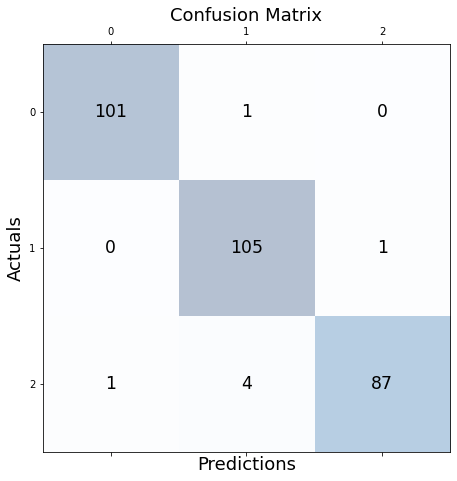

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_svm, labels = clf_model.classes_)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural Networks

In [105]:
from sklearn.neural_network import MLPClassifier

clf_ann = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf_ann.fit(x_train, y_train)
clf_ann.score(x_test, y_test)

C:\Users\Shubham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6

# Hyper-parameter Tuning

In [106]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

In [107]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [108]:
from sklearn.model_selection import GridSearchCV

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf_mlp.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [109]:
clf_mlp.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [110]:
clf_mlp.best_score_

0.9622222222222222

In [111]:
y_pred_mlp = clf_mlp.predict(x_test)

In [112]:
accuracy_score(y_test, y_pred_mlp)

0.9633333333333334

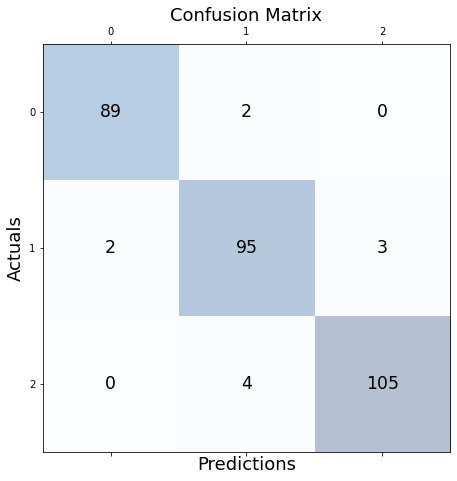

In [114]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_mlp, labels = clf_mlp.classes_)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [115]:
# selected the model with best accuracy and performnce and saved it
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(clf_svm, pickle_out)
pickle_out.close()

# Testing Model on Live Video Feed

In [38]:
haar_data = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

capture = cv2.VideoCapture(0)
data=[]
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            face = face.reshape(1,-1)
            face = pca.transform(face)
            pred = classifier.predict(face)
            n = names[int(pred)]
            cv2.putText(img, n, (x,y), font, 1, (244, 250, 250), 2)
            print(n)
        cv2.imshow('result',img)
        if cv2.waitKey(2) ==27:
            break
capture.release()
cv2.destroyAllWindows()

Mask
Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Improper Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
N

KeyboardInterrupt: 